In [1]:
import json
import struct
import numpy as np
import matplotlib.pyplot as plt
import photonforge as pf
import siepic_forge as siepic
import luxtelligence_lnoi400_forge as lxt
import tidy3d as td

td.config.logging_level = "ERROR"

# Set up technologies
siepic_tech = siepic.ebeam()
basic_tech = pf.basic_technology()
lxt_tech = lxt.lnoi400()
pf.config.default_technology = siepic_tech

# Initialize live viewer for real-time visualization
from photonforge.live_viewer import LiveViewer
viewer = LiveViewer()

# Define simulation parameters
wavelengths = np.linspace(1.53, 1.57, 101)
freqs = pf.C_0 / wavelengths

LiveViewer started at http://localhost:63947


In [2]:
dual_mode_spec = siepic_tech.ports["TE_1550_500"].copy()
dual_mode_spec.num_modes = 2  # Use both modes

siepic_tech.add_port("TE-TM_1550_500", dual_mode_spec)
siepic_tech.ports["TE-TM_1550_500"]

PortSpec(description="Strip TE 1550 nm, w=500 nm", width=2, limits=(-1, 1.22), num_modes=2, added_solver_modes=0, polarization="", target_neff=3.5, default_radius=0, path_profiles=[(0.5, 0, (1, 0))])

In [3]:
plasmonic_gold_gap = 0.03  # Gap between waveguide and gold
plasmonic_gold_thickness = 0.14  # Thickness of the gold layer
wg_height = 0.22

plasmonic_gold_layer = pf.LayerSpec(layer=(15, 0), description="Metal", color="FFE747", pattern="xx")

siepic_tech.add_layer("Plasmonic Gold Top", plasmonic_gold_layer)

plasmonic_gold_extrusion = pf.ExtrusionSpec(mask_spec=pf.MaskSpec((15, 0)), 
                                            medium={"optical": td.material_library['Au']['JohnsonChristy1972'], 
                                                    "electrical": td.LossyMetalMedium(conductivity=17.0, fit_param={'attrs': {}, 'max_num_poles': 16, 'tolerance_rms': 0.001, 'frequency_sampling_points': 20, 'log_sampling': True, 'type': 'SurfaceImpedanceFitterParam'}, frequency_range=(100000000.0, 200000000000.0))}, 
                                                    limits=(wg_height+plasmonic_gold_gap, wg_height+plasmonic_gold_gap+plasmonic_gold_thickness), sidewall_angle=0, reference="top")
siepic_tech.insert_extrusion_spec(4, plasmonic_gold_extrusion)

Name,Layer,Description,Color,Pattern
Si,"(1, 0)",Waveguides,#ff80a818,\\
PinRec,"(1, 10)",SiEPIC,#00408018,/
PinRecM,"(1, 11)",SiEPIC,#00408018,/
Si_Litho193nm,"(1, 69)",Waveguides,#cc80a818,\
Waveguide,"(1, 99)",Waveguides,#ff80a818,\
Si slab,"(2, 0)",Waveguides,#80a8ff18,/
SiN,"(4, 0)",Waveguides,#a6cee318,\\
Oxide open (to BOX),"(6, 0)",Waveguides,#ffae0018,\
Text,"(10, 0)",,#0000ff18,\
M1_heater,"(11, 0)",Metal,#ebc63418,xx


In [4]:
plasmonic_gold_gap = 0.03  # Gap between waveguide and gold
plasmonic_gold_thickness = 0.14  # Thickness of the gold layer
wg_height = 0.22

plasmonic_gold_layer = pf.LayerSpec(layer=(16, 0), description="Metal", color="FFE747", pattern="xx")

siepic_tech.add_layer("Plasmonic Gold Side", plasmonic_gold_layer)

plasmonic_gold_extrusion = pf.ExtrusionSpec(mask_spec=pf.MaskSpec((16, 0)), 
                                            medium={"optical": td.material_library['Au']['JohnsonChristy1972'], 
                                                    "electrical": td.LossyMetalMedium(conductivity=17.0, fit_param={'attrs': {}, 'max_num_poles': 16, 'tolerance_rms': 0.001, 'frequency_sampling_points': 20, 'log_sampling': True, 'type': 'SurfaceImpedanceFitterParam'}, frequency_range=(100000000.0, 200000000000.0))}, 
                                                    limits=(wg_height/2, wg_height), sidewall_angle=0, reference="top")
siepic_tech.insert_extrusion_spec(5, plasmonic_gold_extrusion)

Name,Layer,Description,Color,Pattern
Si,"(1, 0)",Waveguides,#ff80a818,\\
PinRec,"(1, 10)",SiEPIC,#00408018,/
PinRecM,"(1, 11)",SiEPIC,#00408018,/
Si_Litho193nm,"(1, 69)",Waveguides,#cc80a818,\
Waveguide,"(1, 99)",Waveguides,#ff80a818,\
Si slab,"(2, 0)",Waveguides,#80a8ff18,/
SiN,"(4, 0)",Waveguides,#a6cee318,\\
Oxide open (to BOX),"(6, 0)",Waveguides,#ffae0018,\
Text,"(10, 0)",,#0000ff18,\
M1_heater,"(11, 0)",Metal,#ebc63418,xx


In [5]:
class ThermalModel(pf.Model):
    def __init__(self, n_complex, voltage=0, coefficient=3e-4):
        super().__init__(
            n_complex=n_complex,
            voltage=voltage,
            coefficient=coefficient,
        )
        self.n_complex = np.array(n_complex, ndmin=2)
        self.voltage = voltage
        self.coefficient = coefficient

    def __copy__(self):
        return ThermalModel(self.n_complex, self.voltage, self.coefficient)

    def __deepcopy__(self, memo=None):
        # n_complex is an array, so we want to make sure to create a deep copy of it.
        # Other values (voltage and coefficient) are immutable (floats), so we can use them directly.
        return ThermalModel(self.n_complex.copy(), self.voltage, self.coefficient)

    def __repr__(self):
        return f"ThermalModel({self.n_complex!r}, {self.voltage!r}, {self.coefficient!r})"

    def __str__(self):
        return f"ThermalModel at {self.voltage} V"

    @property
    def as_bytes(self):
        coeffs = struct.pack("<2d", self.voltage, self.coefficient)
        shape = struct.pack("<2l", *self.n_complex.shape)
        n_data = self.n_complex.astype(complex).tobytes()
        # Add version 0 as first byte
        return b"\x00" + coeffs + shape + n_data

    @classmethod
    def from_bytes(cls, byte_repr):
        version = byte_repr[0]
        if version != 0:
            raise RuntimeError(f"Incompatible version for ThermalModel: {version}")

        byte_repr = byte_repr[1:]
        fmt = "<2d2l"
        head_len = struct.calcsize(fmt)
        voltage, coefficient, rows, cols = struct.unpack(fmt, byte_repr[:head_len])

        byte_repr = byte_repr[head_len:]
        n_complex = np.frombuffer(byte_repr, dtype=complex).reshape((rows, cols))

        return cls(n_complex, voltage, coefficient)

    @pf.cache_s_matrix
    def start(self, component, frequencies, voltage=None, **kwargs):
        # Allow overriding voltage as an `s_matrix` kwarg too
        if voltage is None:
            voltage = self.voltage
        n_complex = self.n_complex + self.coefficient * voltage**2
        wg_model = pf.WaveguideModel(n_complex)
        return wg_model.start(component, frequencies, **kwargs)


pf.register_model_class(ThermalModel)

In [6]:
@pf.parametric_component
def create_mzm(*, name, port_spec="TE_1550_500", coupling_distance=0.6, coupling_length=5.35, ps_length=100):

    # Bend and Straight waveguide to form the microring
    phase_shifter = pf.parametric.straight(name=f"ps", port_spec=port_spec, length=ps_length)
    straight = pf.parametric.straight(port_spec=port_spec, length=ps_length)
    bend = pf.parametric.bend(port_spec=port_spec, radius=5)
    coupler = pf.parametric.dual_ring_coupler(
        port_spec=port_spec, coupling_distance=coupling_distance, coupling_length=coupling_length, radius=5, 
        tidy3d_model_kwargs={
            # These symmetries are not correct for arbitrary ports.
            # They can be used in this case for the fundamental mode.
            "port_symmetries": [
                ("P1", "P0", "P3", "P2"),
                ("P2", "P3", "P0", "P1"),
                ("P3", "P2", "P1", "P0"),
            ],
        },
    )

    # Solve for the port mode of the waveguide and extract the complex refractive index
    alpha = 10
    kappa = (alpha * wavelengths * 1e-4 * np.log(10)) / (40 * np.pi)
    mode_solver = pf.port_modes(port=phase_shifter.ports["P0"], frequencies=freqs)
    n_complex = mode_solver.data.n_complex.values.T + 1j * kappa  # add propagation loss

    thermal_model = ThermalModel(n_complex=n_complex)
    phase_shifter.add_model(thermal_model, "Thermal")

    mzm = pf.Component(name)

    # form main microring structure
    cp1_ref = mzm.add_reference(coupler)
    cp2_ref = mzm.add_reference(coupler)
    ps1_ref = mzm.add_reference(phase_shifter)
    bend1_ref = mzm.add_reference(bend)
    bend2_ref = mzm.add_reference(bend) 
    bend3_ref = mzm.add_reference(bend)
    bend4_ref = mzm.add_reference(bend) 
    str1_ref = mzm.add_reference(straight)

    #Coupler Kiri
    bend1_ref.connect("P1", cp1_ref["P3"])
    bend2_ref.connect("P0", cp1_ref["P2"])
    #Tengah
    # trans1_ref.connect("P0", bend1_ref["P0"])
    ps1_ref.connect("P0", bend1_ref["P0"])
    str1_ref.connect("P0", bend2_ref["P1"])

    # trans2_ref.connect("P1", ps1_ref["P1"])
    bend3_ref.connect("P1", ps1_ref["P1"])
    bend4_ref.connect("P0", str1_ref["P1"])
    #Coupler Kanan
    cp2_ref.connect("P1", bend3_ref["P0"])
    cp2_ref.connect("P0", bend4_ref["P1"])


    # Define the heater and electrical path
    terminal_width = 10
    heater_width = 2

    heater = (
        pf.Path((ps1_ref.x_min, ps1_ref.y_mid), heater_width)
        .segment((ps1_ref.x_max, ps1_ref.y_mid), heater_width)
    )

    route_vp = (
        pf.Path((cp1_ref.x_mid-terminal_width/2, ps1_ref.y_mid), terminal_width)
        .segment((cp1_ref.x_mid+terminal_width/2, ps1_ref.y_mid), terminal_width)
        .segment((ps1_ref.x_min, ps1_ref.y_mid), heater_width)
    )

    route_vn = (
        pf.Path((ps1_ref.x_max, ps1_ref.y_mid), heater_width)
        .segment((cp2_ref.x_mid-terminal_width/2, ps1_ref.y_mid), terminal_width)
        .segment((cp2_ref.x_mid+terminal_width/2, ps1_ref.y_mid), terminal_width)
    )

    mzm.add((11,0), heater)
    mzm.add((12,0), route_vp)
    mzm.add((12,0), route_vn)
    mzm.add_terminal(pf.Terminal((12,0), pf.Rectangle(size=(terminal_width, terminal_width), center=(cp1_ref.x_mid, ps1_ref.y_mid))), "VP")
    mzm.add_terminal(pf.Terminal((12,0), pf.Rectangle(size=(terminal_width, terminal_width), center=(cp2_ref.x_mid, ps1_ref.y_mid))), "VN")

    ## COMPONENT MODELS
    mzm.add_port(mzm.detect_ports([port_spec]))
    mzm.add_model(pf.CircuitModel(), "CircuitModel")

    port_symmetries = [
        ("P1", "P0", "P3", "P2"),
        ("P2", "P3", "P0", "P1"),
        ("P3", "P2", "P1", "P0"),
    ]

    field_monitor = td.FieldMonitor(
        center=(0, 0, 0.11), size=(td.inf, td.inf, 0), freqs=[freqs.mean()], name="field"
    )

    # mzm.add_model(pf.Tidy3DModel(port_symmetries=port_symmetries, monitors=[field_monitor]), "Tidy3DModel")

    return mzm

# mzm = create_mzm(name="mzm", port_spec="TE-TM_1550_500", coupling_length=4.3)
# viewer(mzm)

In [7]:
@pf.parametric_component
def create_hybrid_rotator(*, gold_top_length=3.15, gold_top_width=0.25, gold_side_length=1.4, gold_side_width=0.14, gold_location="Left", gold_side=False, wg_length=10.0):

    wg_height = 0.22
    wg_width = 0.5

    # Create an empty component named "HybridRotator"
    hybrid_rotator = pf.Component("HybridRotator")

    waveguide = pf.Rectangle(size=(wg_length, wg_width))
    gold_plate = pf.Rectangle(size=(gold_top_length, gold_top_width), center=(0, (-1 if gold_location == "Right" else 1)*(wg_width/2 - gold_top_width/2)))

    # Add the geometry to the "Si" and "Plasmonic Gold" layers
    hybrid_rotator.add("Si", waveguide)
    hybrid_rotator.add("Plasmonic Gold Top", gold_plate)
    if gold_side:
        gold_side = pf.Rectangle(size=(gold_side_length, gold_side_width), center=(gold_top_length/2 + gold_side_length/2, (1 if gold_location == "Right" else -1)*(wg_width/2 + gold_side_width/2 + plasmonic_gold_gap)))
        hybrid_rotator.add("Plasmonic Gold Side", gold_side)

    hybrid_rotator.add_port(
        pf.Port(center=(-wg_length/2, 0), input_direction=0, spec=siepic_tech.ports["TE-TM_1550_500"])
    )

    hybrid_rotator.add_port(
        pf.Port(center=(wg_length/2, 0), input_direction=180, spec=siepic_tech.ports["TE-TM_1550_500"])
    )

    field_monitor = td.FieldMonitor(
        center=(0, 0, 0.11), size=(td.inf, td.inf, 0), freqs=[freqs.mean()], name="field"
    )

    input_monitor = td.FieldMonitor(
        center=[-wg_length/2, 0.0, wg_height / 2],
        size=[0.0, wg_width * 3, wg_height * 3],
        freqs=freqs,
        name="input",
        fields=["Ex", "Ey", "Ez", "Hx", "Hy", "Hz"]
    )

    output_monitor = td.FieldMonitor(
        center=[wg_length/2, 0.0, wg_height / 2],
        size=[0.0, wg_width * 3, wg_height * 3],
        freqs=freqs,
        name="output",
        fields=["Ex", "Ey", "Ez", "Hx", "Hy", "Hz"]
    )

    # Include the Tidy3D simulation model
    hybrid_rotator.add_model(pf.Tidy3DModel(monitors=[field_monitor, input_monitor, output_monitor]), "Tidy3DModel")
    return hybrid_rotator


# Instantiate the component with custom dimensions
# hybrid_rotator = create_hybrid_rotator(gold_location="Right", gold_side=True)
# viewer(hybrid_rotator)

In [8]:
@pf.parametric_component
def create_psr(
    *,
    rotator_length=30,
    mid_taper_length=4.95,
    splitter_length=42.36,
    taper_length=10,
    rotator_width=1.2,
    taper_width=0.1,
    coupler_width1=0.9,
    coupler_width2=0.75,
    splitter_width1=0.2,
    gap=0.15,
    s_factor=6,
    model_kwargs={},
):
    component = pf.Component()

    core_width = 0.5
    output_separation = 2

    s_bend_length = s_factor * output_separation
    splitter_width2 = coupler_width1 + splitter_width1 - coupler_width2
    if splitter_width2 <= 0:
        raise ValueError("Invalid input")

    p0 = (0, 0)
    p1 = (
        rotator_length
        + mid_taper_length
        + splitter_length
        + s_bend_length
        + taper_length,
        -output_separation,
    )
    p2 = (
        rotator_length
        + mid_taper_length
        + splitter_length
        + s_bend_length
        + taper_length,
        gap + 0.5 * (coupler_width2 + splitter_width2),
    )
    tapers = [
        pf.Path(p0, core_width).segment((rotator_length, 0), taper_width),
        pf.Path(p1, core_width).segment((-taper_length, 0), taper_width, relative=True),
        pf.Path(p2, core_width).segment((-taper_length, 0), taper_width, relative=True),
    ]

    main_path = (
        pf.Path((0, 0), core_width)
        .segment((rotator_length, 0), rotator_width)
        .segment((mid_taper_length, 0), coupler_width1, relative=True)
        .segment((splitter_length, 0), coupler_width2, relative=True)
        .s_bend((s_bend_length, -output_separation), euler_fraction=0.5, relative=True)
        .segment((taper_length, 0), core_width, relative=True)
    )

    coupled_path = (
        pf.Path(p2, core_width)
        .segment((-taper_length, 0), splitter_width2, relative=True)
        .segment((-s_bend_length, 0), relative=True)
        .segment((-splitter_length, 0), splitter_width1, relative=True)
    )
    component.add("Si", *tapers, "Si slab", main_path, coupled_path)

    input_monitor = td.FieldMonitor(
        center=[0, 0.0, wg_height / 2],
        size=[0.0, core_width * 3, wg_height * 3],
        freqs=freqs,
        name="input",
        fields=["Ex", "Ey", "Ez", "Hx", "Hy", "Hz"]
    )

    rotator_monitor = td.FieldMonitor(
        center=[rotator_length, 0.0, wg_height / 2],
        size=[0.0, core_width * 3, wg_height * 3],
        freqs=freqs,
        name="rotator_output",
        fields=["Ex", "Ey", "Ez", "Hx", "Hy", "Hz"]
    )

    field_monitor = td.FieldMonitor(
        center=(0, 0, 0.05), size=(td.inf, td.inf, 0), freqs=[freqs.mean()], name="field"
    )

    p1_monitor = td.FieldMonitor(
        center=[p1[0], p1[1], wg_height / 2],
        size=[0.0, core_width * 3, wg_height * 3],
        freqs=freqs,
        name="p1",
        fields=["Ex", "Ey", "Ez", "Hx", "Hy", "Hz"]
    )

    p2_monitor = td.FieldMonitor(
        center=[p2[0], p2[1], wg_height / 2],
        size=[0.0, core_width * 3, wg_height * 3],
        freqs=freqs,
        name="p2",
        fields=["Ex", "Ey", "Ez", "Hx", "Hy", "Hz"]
    )

    component.add_port(
        [
            pf.Port(p0, 0, "TE-TM_1550_500"),
            pf.Port(p1, 180, "TE_1550_500"),
            pf.Port(p2, 180, "TE_1550_500"),
        ]
    )

    component.add_model(pf.Tidy3DModel(**model_kwargs, monitors=[input_monitor, rotator_monitor, p1_monitor, p2_monitor, field_monitor]), "Tidy3D")
    return component


# psr = create_psr()
# viewer(psr)

In [9]:
@pf.parametric_component
def create_y_branch(port_spec="TE-TM_1550_500", input_length=10, output_length=20, offset_up=5, offset_down=5):
    port_width = 0.5

    component = pf.Component("y_branch")

    sbend_up = pf.parametric.s_bend(port_spec=port_spec, length=output_length, offset=offset_up)
    sbend_down = pf.parametric.s_bend(port_spec=port_spec, length=output_length, offset=-offset_down)

    taper = pf.stencil.linear_taper(input_length, [port_width, port_width*2])
    component.add("Si", taper)

    sb1_ref = component.add_reference(sbend_up)
    sb2_ref = component.add_reference(sbend_down)
    sb1_ref.x_min = taper.x_max
    sb1_ref.y_min = taper.y_max - port_width
    sb2_ref.x_min = taper.x_max
    sb2_ref.y_max = taper.y_min + port_width

    port_symmetries = [
        ("P0", "P2", "P1"),
    ]

    field_monitor = td.FieldMonitor(
        center=(0, 0, 0.11), size=(td.inf, td.inf, 0), freqs=[freqs.mean()], name="field"
    )

    component.add_port(component.detect_ports([port_spec], on_boundary="x"))
    component.add_model(pf.Tidy3DModel(port_symmetries=port_symmetries, monitors=[field_monitor]), "Tidy3DModel")

    return component

# y_branch = create_y_branch()
# viewer(y_branch)


In [ ]:
# Define a parametric 2x2 MMI splitter component
@pf.parametric_component
def mmi_2x2(
    *,
    l1=4.41,  # length of taper section at input
    l2=4.51,  # length of intermediate taper section
    l3=3.01,  # length of central multimode section
    w1=2.05,  # intermediate width near input/output
    w2=2.05,  # central section width
    w5=0.972,  # input taper narrow width
    w6=0.284,  # gap between input waveguides
    port_spec="TE_1550_500"  # port specification for waveguides
):
    """
    Creates a parametric 2x2 multimode interference (MMI) splitter component.

    Parameters:
        l1, l2, l3 (float): Section lengths.
        w1, w2, w5, w6 (float): Section widths.
        port_spec: Specification for the optical ports.

    Returns:
        PhotonForge Component: Configured MMI with geometry and simulation model.
    """
    # Resolve port specification if provided as string
    if isinstance(port_spec, str):
        port_spec = pf.config.default_technology.ports[port_spec]

    # Initialize an empty component named "MMI2x2"
    mmi = pf.Component("MMI2x2")

    # Extract default waveguide width from port specification
    wg_width, _ = port_spec.path_profile_for("Si")

    # Calculate widths based on given parameters
    w3 = 2 * w5 + w6
    w4 = wg_width

    # Define paths for input and output waveguides
    input_wg_up = pf.Path((0, (w5 + w6) / 2), w4).segment((l1, 0), w5, relative=True)
    input_wg_down = input_wg_up.copy().mirror()
    output_wg_up = input_wg_up.copy().mirror(
        axis_endpoint=(l1 + l2 + l3, 1), axis_origin=(l1 + l2 + l3, 0)
    )
    output_wg_down = output_wg_up.copy().mirror()

    # Define the central multimode section of MMI
    central_section = (
        pf.Path((l1, 0), w3)
        .segment((l2, 0), w1, relative=True)
        .segment((l3, 0), w2, relative=True)
        .segment((l3, 0), w2, relative=True)
        .segment((l2, 0), w3, relative=True)
    )

    # Add the defined geometries to the silicon ("Si") layer
    mmi.add(
        "Si", input_wg_up, input_wg_down, output_wg_up, output_wg_down, central_section
    )

    # Automatically detect and add ports
    mmi.add_port(mmi.detect_ports([port_spec]))
    
    assert len(mmi.ports) == 4, "Port detection failed: expected exactly 4 ports."

    # Include the Tidy3D simulation model with specified port symmetries
    mmi.add_model(
        pf.Tidy3DModel(
            port_symmetries=[
                ("P1", "P0", "P3", "P2"),  # reflection symmetry about x axis
                ("P2", "P3", "P0", "P1"),  # reflection symmetry about y axis
                ("P3", "P2", "P1", "P0"),  # inversion symmetry about the origin
            ],
        ),
        "Tidy3DModel",
    )

    return mmi

# Instantiate the MMI component with default dimensions
# mmi = mmi_2x2(port_spec="TE_1550_500")
# viewer(mmi)

In [119]:
@pf.parametric_component
def create_bob_top(rotator_input="0", use_gc=True):
    bob_top = pf.Component("bob_top")

    ps_length = 100
    phase_shifter = pf.parametric.straight(name=f"ps", port_spec="TE_1550_500", length=ps_length)
    straight = pf.parametric.straight(port_spec="TE_1550_500", length=ps_length)
    half_straight = pf.parametric.straight(port_spec="TE_1550_500", length=10)
    bend = pf.parametric.bend(port_spec="TE_1550_500", radius=5)
    sbend_up = pf.parametric.s_bend(port_spec="TE_1550_500", length=20, offset=15)
    sbend_down = pf.parametric.s_bend(port_spec="TE_1550_500", length=20, offset=-15)
    mmi = mmi_2x2(port_spec="TE_1550_500")
    mzm_base = create_mzm(name="mzm_base", port_spec="TE_1550_500", coupling_length=5.35)
    y_branch = create_y_branch(port_spec="TE-TM_1550_500")
    grating_coupler = siepic.component("ebeam_gc_te1550")
    crossing = pf.parametric.crossing(
        port_spec="TE_1550_500", arm_length=5, extra_length=0.5, added_width=1,
        tidy3d_model_kwargs={
            "port_symmetries": [
                ("P1", "P0", "P3", "P2"),
                ("P2", "P3", "P0", "P1"),
                ("P3", "P2", "P1", "P0"),
            ],
        }
    )

    # Solve for the port mode of the waveguide and extract the complex refractive index
    alpha = 10
    kappa = (alpha * wavelengths * 1e-4 * np.log(10)) / (40 * np.pi)
    mode_solver = pf.port_modes(port=phase_shifter.ports["P0"], frequencies=freqs)
    n_complex = mode_solver.data.n_complex.values.T + 1j * kappa  # add propagation loss

    thermal_model = ThermalModel(n_complex=n_complex)
    phase_shifter.add_model(thermal_model, "Thermal")

    psr = create_psr()

    rotator_n45 = create_hybrid_rotator(gold_location="Left")
    rotator_45 = create_hybrid_rotator(gold_location="Right")
    rotator_90 = create_hybrid_rotator(gold_location="Right", gold_side=True)
    rotator_0 = pf.parametric.transition(port_spec1="TE_1550_500", port_spec2="TE-TM_1550_500", length=10)

    #input rotator and split
    yb1_ref = bob_top.add_reference(y_branch)
    if (rotator_input != None):
        if rotator_input == "45":
            rot1_ref = bob_top.add_reference(rotator_45)
        elif rotator_input == "-45":
            rot1_ref = bob_top.add_reference(rotator_n45)
        elif rotator_input == "90":
            rot1_ref = bob_top.add_reference(rotator_90)
        else:
            rot1_ref = bob_top.add_reference(rotator_0)

        hst1_ref = bob_top.add_reference(half_straight)
        rot1_ref.connect("P0", hst1_ref["P1"])
        yb1_ref.connect("P0", rot1_ref["P1"])
    if use_gc:
        gc1_ref = bob_top.add_reference(grating_coupler)
        yb1_ref.connect("P0", gc1_ref["P0"])

    # 45/-45 DECISION REGION
    #45/-45 PSR
    psr1_ref = bob_top.add_reference(psr)
    sb1_ref = bob_top.add_reference(sbend_up)
    sb2_ref = bob_top.add_reference(sbend_down)
    psr1_ref.x_min = yb1_ref.x_max + 10
    psr1_ref.y_max = yb1_ref.y_min - 15
    route_psr1_0 = pf.parametric.route(port1=(yb1_ref, "P1"), port2=(psr1_ref, "P0"), radius=5)
    bob_top.add_reference(route_psr1_0)
    sb1_ref.connect("P0", psr1_ref["P2"])
    sb2_ref.connect("P0", psr1_ref["P1"])

    #phase shifter if necessary
    ps1_ref = bob_top.add_reference(phase_shifter)
    str1_ref = bob_top.add_reference(straight)
    ps1_ref.connect("P0", sb1_ref["P1"])
    str1_ref.connect("P0", sb2_ref["P1"])

    #PSR MMI
    mmi1_ref = bob_top.add_reference(mmi)
    mmi1_ref.x_min = ps1_ref.x_max + 10
    mmi1_ref.y_mid = (ps1_ref.y_mid + str1_ref.y_mid) / 2
    route_mmi1_1 = pf.parametric.route(port1=(ps1_ref, "P1"), port2=(mmi1_ref, "P1"), radius=5)
    bob_top.add_reference(route_mmi1_1)
    route_mmi1_0 = pf.parametric.route(port1=(str1_ref, "P1"), port2=(mmi1_ref, "P0"), radius=5)
    bob_top.add_reference(route_mmi1_0)

    #45/-45 decision output
    hst2_ref = bob_top.add_reference(half_straight)
    hst3_ref = bob_top.add_reference(half_straight)
    hst2_ref.x_min = mmi1_ref.x_max + 10
    hst2_ref.y_mid = ps1_ref.y_mid
    hst3_ref.x_min = mmi1_ref.x_max + 10
    hst3_ref.y_mid = str1_ref.y_mid
    route_hst2_0 = pf.parametric.route(port1=(mmi1_ref, "P3"), port2=(hst2_ref, "P0"), radius=5)
    bob_top.add_reference(route_hst2_0)
    route_hst3_0 = pf.parametric.route(port1=(mmi1_ref, "P2"), port2=(hst3_ref, "P0"), radius=5)
    bob_top.add_reference(route_hst3_0)


    # 90/0 DECISION REGION
    # 90/0 PSR
    psr2_ref = bob_top.add_reference(psr)
    sb3_ref = bob_top.add_reference(sbend_up)
    sb4_ref = bob_top.add_reference(sbend_down)
    psr2_ref.x_min = yb1_ref.x_max + 10
    psr2_ref.y_min = yb1_ref.y_max + 15
    route_psr2_0 = pf.parametric.route(port1=(yb1_ref, "P2"), port2=(psr2_ref, "P0"), radius=5)
    bob_top.add_reference(route_psr2_0)
    sb3_ref.connect("P0", psr2_ref["P2"])
    sb4_ref.connect("P0", psr2_ref["P1"])

    #90/0 decision output
    hst4_ref = bob_top.add_reference(half_straight)
    hst5_ref = bob_top.add_reference(half_straight)
    hst4_ref.x_min = mmi1_ref.x_max + 10
    hst4_ref.y_max = sb3_ref.y_max
    hst5_ref.x_min = mmi1_ref.x_max + 10
    hst5_ref.y_min = sb4_ref.y_min
    route_hst4_0 = pf.parametric.route(port1=(sb3_ref, "P1"), port2=(hst4_ref, "P0"), radius=5)
    bob_top.add_reference(route_hst4_0)
    route_hst5_0 = pf.parametric.route(port1=(sb4_ref, "P1"), port2=(hst5_ref, "P0"), radius=5)
    bob_top.add_reference(route_hst5_0)


    # OUTPUT COMBINE REGION
    #crossings
    cross1_ref = bob_top.add_reference(crossing)
    cross1_ref.connect("P0", hst2_ref["P1"])
    route_cross1_3 = pf.parametric.route(port1=(hst5_ref, "P1"), port2=(cross1_ref, "P3"), radius=5)
    bob_top.add_reference(route_cross1_3)

    #mirror MZM
    mzm1_ref = bob_top.add_reference(mzm_base)
    mzm1_ref.x_min = cross1_ref.x_max + 20
    mzm1_ref.y_mid = (hst3_ref.y_mid + hst2_ref.y_mid) / 2
    mzm2_ref = bob_top.add_reference(mzm_base)
    mzm2_ref.x_min = cross1_ref.x_max + 20
    mzm2_ref.y_mid = (hst4_ref.y_mid + hst5_ref.y_mid) / 2
    route_mzm1_0 = pf.parametric.route(port1=(hst3_ref, "P1"), port2=(mzm1_ref, "P0"), radius=5)
    bob_top.add_reference(route_mzm1_0)
    route_mzm1_1 = pf.parametric.route(port1=(cross1_ref, "P1"), port2=(mzm1_ref, "P1"), radius=5)
    bob_top.add_reference(route_mzm1_1)
    route_mzm2_0 = pf.parametric.route(port1=(cross1_ref, "P2"), port2=(mzm2_ref, "P0"), radius=5)
    bob_top.add_reference(route_mzm2_0)
    route_mzm2_1 = pf.parametric.route(port1=(hst4_ref, "P1"), port2=(mzm2_ref, "P1"), radius=5)
    bob_top.add_reference(route_mzm2_1)

    #final output
    hst6_ref = bob_top.add_reference(half_straight)
    hst7_ref = bob_top.add_reference(half_straight)
    bend1_ref = bob_top.add_reference(bend)
    bend2_ref = bob_top.add_reference(bend)
    bend1_ref.connect("P0", mzm1_ref["P2"])
    bend2_ref.connect("P0", mzm2_ref["P2"])
    hst6_ref.connect("P0", bend1_ref["P1"])
    hst7_ref.connect("P0", bend2_ref["P1"])
    if use_gc:
        gc2_ref = bob_top.add_reference(grating_coupler)
        gc3_ref = bob_top.add_reference(grating_coupler)
        gc2_ref.connect("P0", hst6_ref["P1"])
        gc3_ref.connect("P0", hst7_ref["P1"])

    #ELECTRICAL CONNECTIONS
    terminal_width = 15

    # Terminals
    bob_top.add_terminal(pf.Terminal((12,0), pf.Rectangle(size=(terminal_width, terminal_width), 
                                                            center=(mzm2_ref.x_min + terminal_width/2 + 0.425, mzm2_ref.y_max + terminal_width/2 + 10))), 
                        "V_BASE", add_structure=True)
    bob_top.add_terminal(pf.Terminal((12,0), pf.Rectangle(size=(terminal_width, terminal_width), 
                                                            center=(mzm2_ref.x_max - terminal_width/2 - 0.425, mzm2_ref.y_max + terminal_width/2 + 10))), 
                        "GND", add_structure=True)

    pads = bob_top.terminals

    # Electrical routing

    # V_BASE
    bob_top.add(
        pf.parametric.route_manhattan(
            terminal1=(mzm1_ref, "VP", 0),
            terminal2=pads["V_BASE"],
            direction1="y",
            direction2="y",
            width=10,
        ),
    )

    # GND
    bob_top.add(
        pf.parametric.route_manhattan(
            terminal1=(mzm1_ref, "VN", 0),
            terminal2=pads["GND"],
            direction1="y",
            direction2="y",
            width=10,
        ),
    )

    bob_top.add_port(bob_top.detect_ports(["TE_1550_500"], on_boundary="x"))
    bob_top.add_model(pf.CircuitModel(), "CircuitModel")

    return bob_top

bob_top = create_bob_top(rotator_input=None, use_gc=True)
viewer(bob_top)

Progress: 100% 


Progress: 100% 


c:\Users\irfan\AppData\Local\Programs\Python\Python313\Lib\site-packages\photonforge\parametric_utils.py:208: RuntimeWarning: Component function '__main__.create_bob_top' previously registered will be overwritten.
  return _decorator(decorated_function)


Progress: 100% 
Progress: 100% 


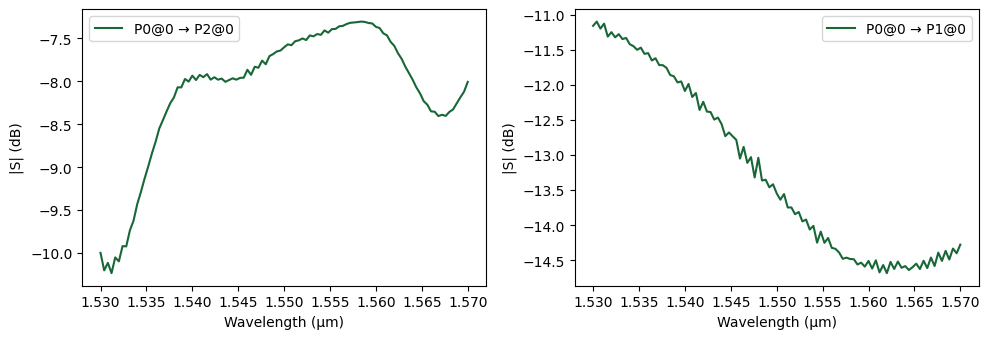

In [117]:
bob_top = create_bob_top(rotator_input="90", use_gc=False)
updates = {("ps", 0): {"model_updates": {"voltage": 4.7}},
           ("mzm_base", 0, "ps", 0): {"model_updates": {"voltage": 0.0}},
           ("mzm_base", 1, "ps", 0): {"model_updates": {"voltage": 0.0}},
           }
s_matrix = bob_top.s_matrix(
    pf.C_0 / wavelengths, model_kwargs={"updates": updates}, show_progress=False
)
fig, ax = pf.plot_s_matrix(s_matrix, input_ports=["P0"], output_ports=["P1", "P2"], y="dB")

Progress: 100% 


Progress: 100% 
Progress: 100% 
Progress: 100% 
Progress: 100% 
Progress: 100% 
Progress: 100% 
Progress: 100% 


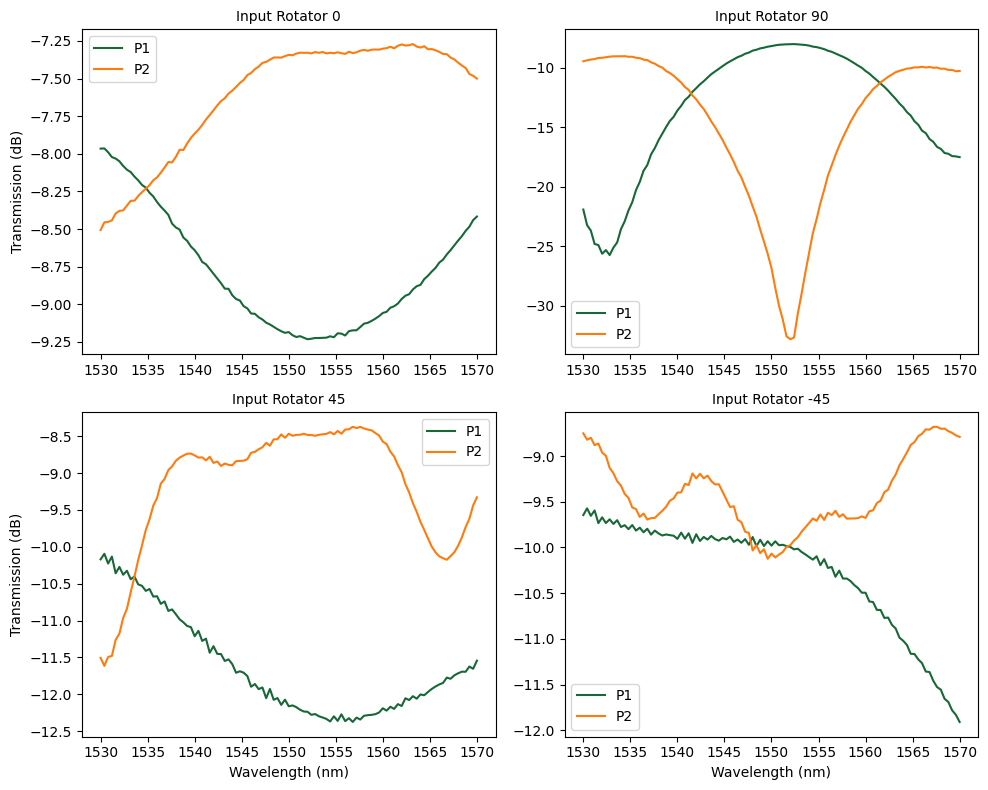

In [124]:
voltages = [5, 0]  # first is LOW voltage, second is HIGH voltage
rotator = [["0", "90"], ["45", "-45"]]

# make one figure/axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for i in range(2):
    for j in range(2):
        bob_top = create_bob_top(rotator_input=rotator[i][j], use_gc=False)
        updates = {("ps", 0): {"model_updates": {"voltage": 4.7}},
                ("mzm_base", 0, "ps", 0): {"model_updates": {"voltage": voltages[i]}},
                ("mzm_base", 1, "ps", 0): {"model_updates": {"voltage": voltages[i]}},
                }
        s_matrix = bob_top.s_matrix(freqs, model_kwargs={"updates": updates, "inputs": ["P0"]})
        axs[i][j].set_title(f"Input Rotator {rotator[i][j]}", fontsize=10)
        s1 = s_matrix[("P0@0", "P1@0")]
        s2 = s_matrix[("P0@0", "P2@0")]
        axs[i][j].plot(
            wavelengths * 1e3,
            10*np.log(np.abs(s1)),
            label=f"P1",
            linewidth=1.5,
        )
        axs[i][j].plot(
            wavelengths * 1e3,
            10*np.log(np.abs(s2)),
            label=f"P2",
            linewidth=1.5,
        )
        axs[i][j].legend()

# labels & legend
axs[1][0].set_xlabel("Wavelength (nm)")
axs[1][1].set_xlabel("Wavelength (nm)")
axs[0][0].set_ylabel("Transmission (dB)")
axs[1][0].set_ylabel("Transmission (dB)")

plt.tight_layout()
plt.show()

In [ ]:
voltages = np.linspace(0, 10, 51)
transmission = np.zeros((voltages.size, 2))
k = len(wavelengths) // 2  # Look at central wavelength

for i, v in enumerate(voltages):
    updates = {("ps", 0): {"model_updates": {"voltage": v}, "inputs": ["P0"]}}
    s = bob_top.s_matrix(
        pf.C_0 / wavelengths, model_kwargs={"updates": updates}, show_progress=False
    )
    transmission[i, 0] = np.abs(s[("P0@0", "P1@0")][k]) ** 2
    transmission[i, 1] = np.abs(s[("P0@0", "P2@0")][k]) ** 2

# Plot results
plt.plot(voltages, transmission)
plt.xlabel("Voltage (V)")
plt.ylabel("Transmission")
plt.legend(["|S₂₀|²", "|S₃₀|²"])
plt.show()